In [1]:
import utils
import plotting
import postprocessing
import numpy as np
import warnings
import pandas as pd
from pandas.errors import SettingWithCopyWarning
from hh_vars import samples, sig_key, data_key, jec_shifts, jmsr_shifts, jec_vars, jmsr_vars
import os

# ignore these because they don't seem to apply
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

from PyPDF2 import PdfFileMerger

from copy import deepcopy

import matplotlib.pyplot as plt
import mplhep as hep
import matplotlib.ticker as mticker

plt.style.use(hep.style.CMS)
hep.style.use("CMS")
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))
plt.rcParams.update({"font.size": 16})

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
plot_dir = "../../../plots/BDTPreProcessing/Feb27"
_ = os.system(f"mkdir -p {plot_dir}")

In [18]:
MAIN_DIR = "../../../"
samples_dir = f"{MAIN_DIR}/../data/skimmer/Feb24"
signal_samples_dir = f"{MAIN_DIR}/../data/skimmer/Feb24"
year = "2017"

# Both Jet's Regressed Mass above 50, electron veto
filters = [
    [
        ("('ak8FatJetMsd', '0')", ">=", 50),
        ("('ak8FatJetMsd', '1')", ">=", 50),
        # ("('nGoodElectrons', '0')", "==", 0),
    ],
]

# save cutflow as pandas table
cutflow = pd.DataFrame(index=list(samples.keys()))

# utils.remove_empty_parquets(samples_dir, year)
events_dict = utils.load_samples(signal_samples_dir, {sig_key: samples[sig_key]}, year, filters)
events_dict |= utils.load_samples(
    samples_dir, {k: samples[k] for k in samples.keys() - [sig_key]}, year, filters
)

utils.add_to_cutflow(events_dict, "BDTPreselection", "weight", cutflow)

# print weighted sample yields
for sample in events_dict:
    tot_weight = np.sum(events_dict[sample]["weight"].values)
    print(f"Pre-selection {sample} yield: {tot_weight:.2f}")

Loaded GluGluToHHTobbVV_node_cHHH1                       : 130356 entries
Loaded TTToSemiLeptonic                                  : 473846 entries
Loaded TTToHadronic                                      : 730375 entries
Loaded ST_s-channel_4f_hadronicDecays                    : 12299 entries
Loaded ST_tW_top_5f_inclusiveDecays                      : 14252 entries
Loaded ST_tW_antitop_5f_inclusiveDecays                  : 10373 entries
Loaded ST_s-channel_4f_leptonDecays                      : 8160 entries
Loaded ST_t-channel_antitop_4f_InclusiveDecays           : 22618 entries
Loaded WJetsToQQ_HT-200to400                             : 0 entries
Loaded ZJetsToQQ_HT-200to400                             : 1 entries
Loaded ZJetsToQQ_HT-400to600                             : 976 entries
Loaded WJetsToQQ_HT-800toInf                             : 107904 entries
Loaded ZJetsToQQ_HT-600to800                             : 54416 entries
Loaded WJetsToQQ_HT-600to800                             :

In [19]:
postprocessing.apply_weights(events_dict, year, cutflow)
bb_masks = postprocessing.bb_VV_assignment(events_dict)
# _ = postprocessing.postprocess_lpsfs(events_dict[sig_key], save_all=False)
cutflow

QCD_SCALE_FACTOR = 0.7874918116801081


,BDTPreselection,TriggerEffs,QCD SF
HHbbVV,2.730219e+00,1.571586,1.571586
QCD,1.544155e+06,801909.413444,631497.096796
TT,1.399972e+05,90716.396643,90716.396643
ST,8.477084e+03,5674.177784,5674.177784
V+Jets,4.556748e+04,27734.919573,27734.919573
Diboson,7.514465e+02,468.409204,468.409204
Data,7.560910e+05,756091.000000,756091.000000


In [20]:
hists = {}

sig_scale = 481100.7679663318


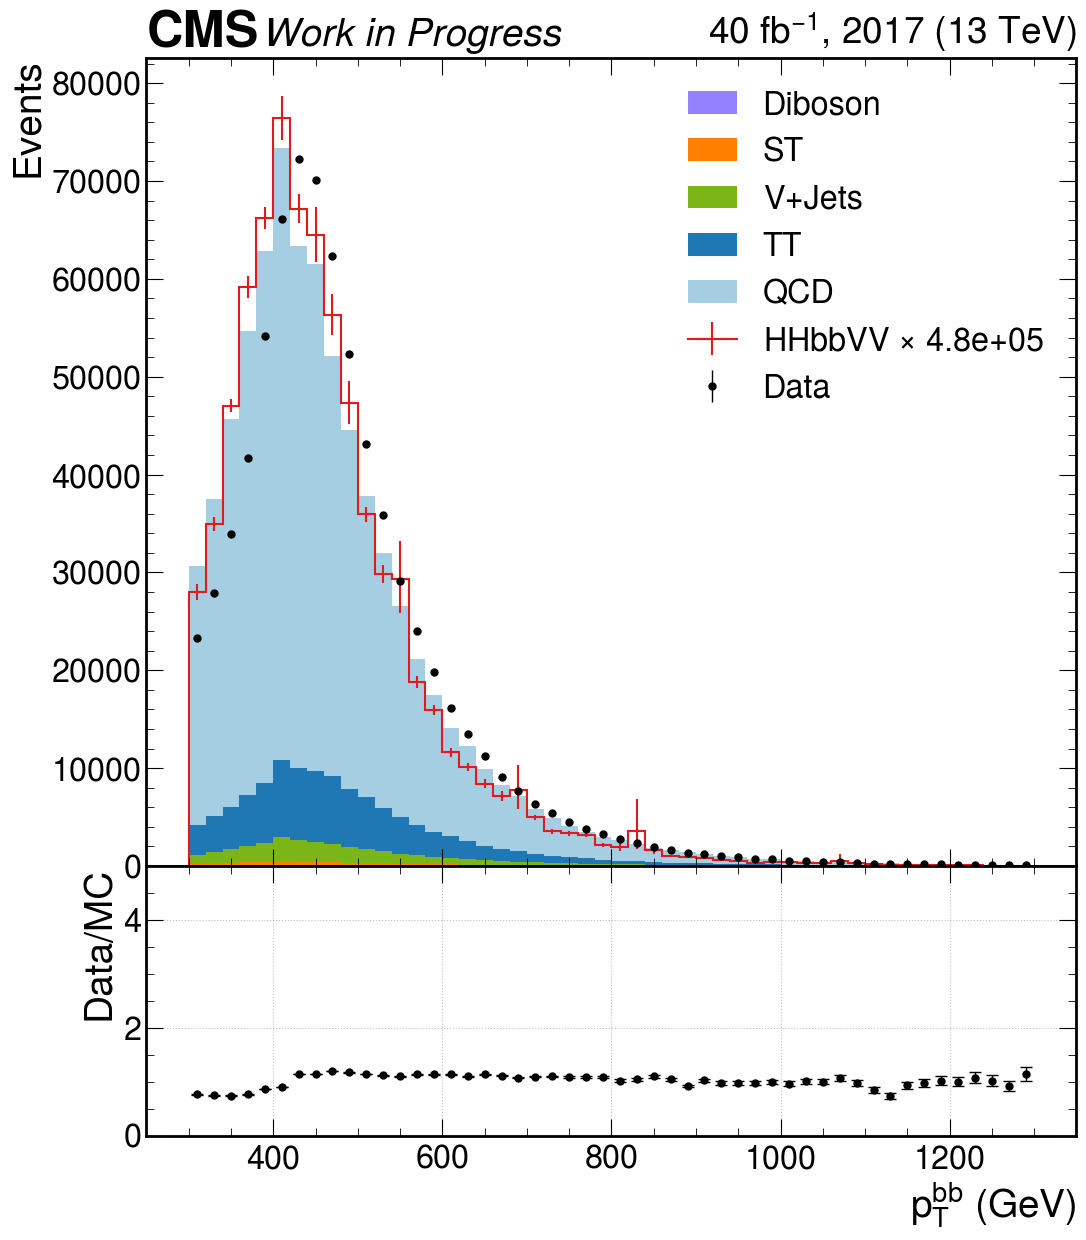

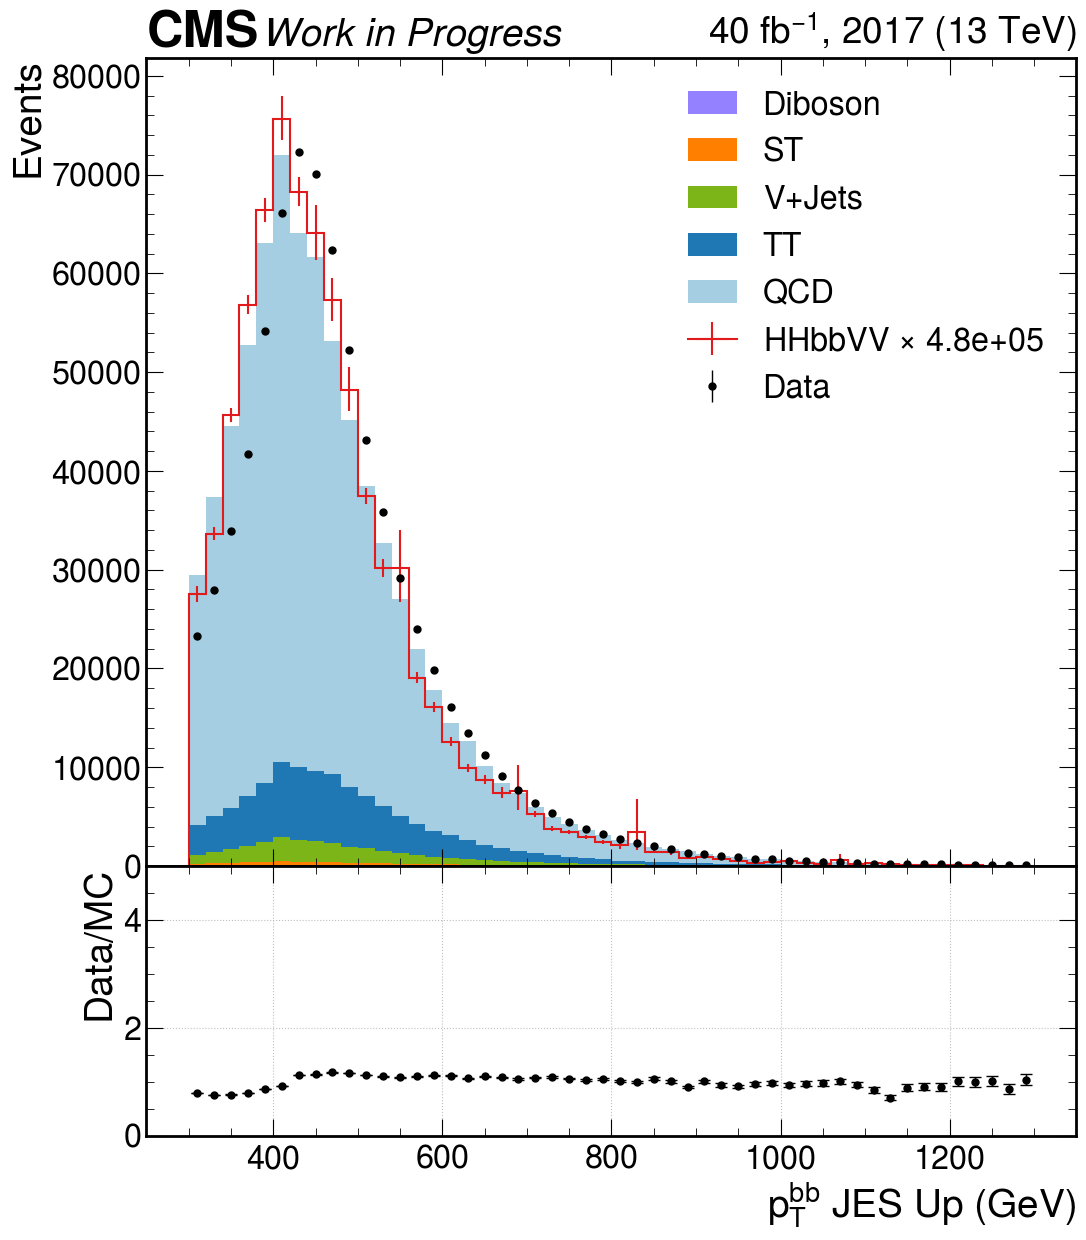

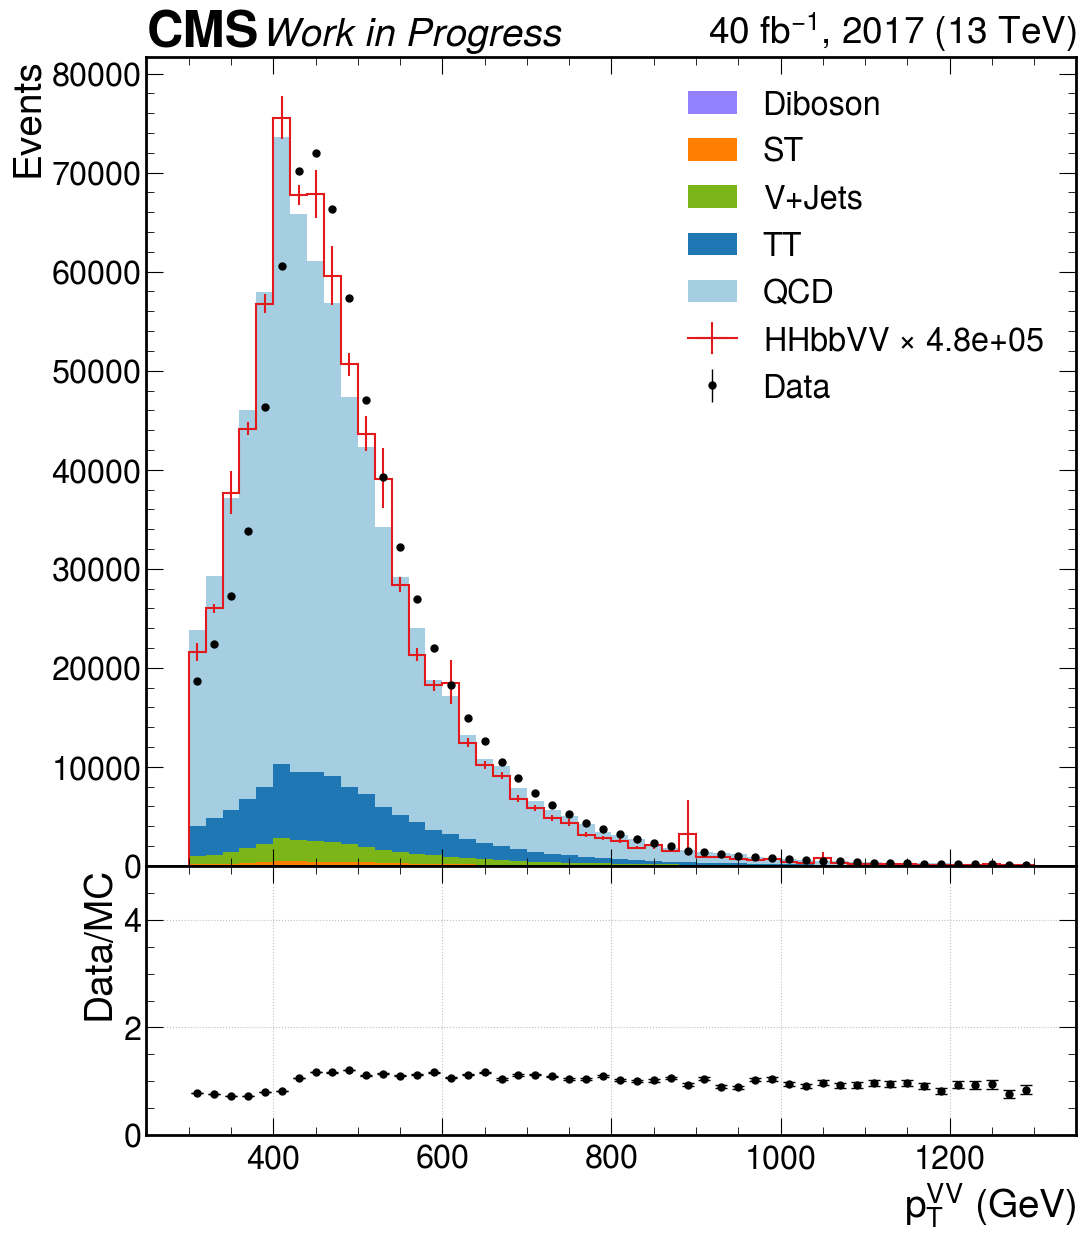

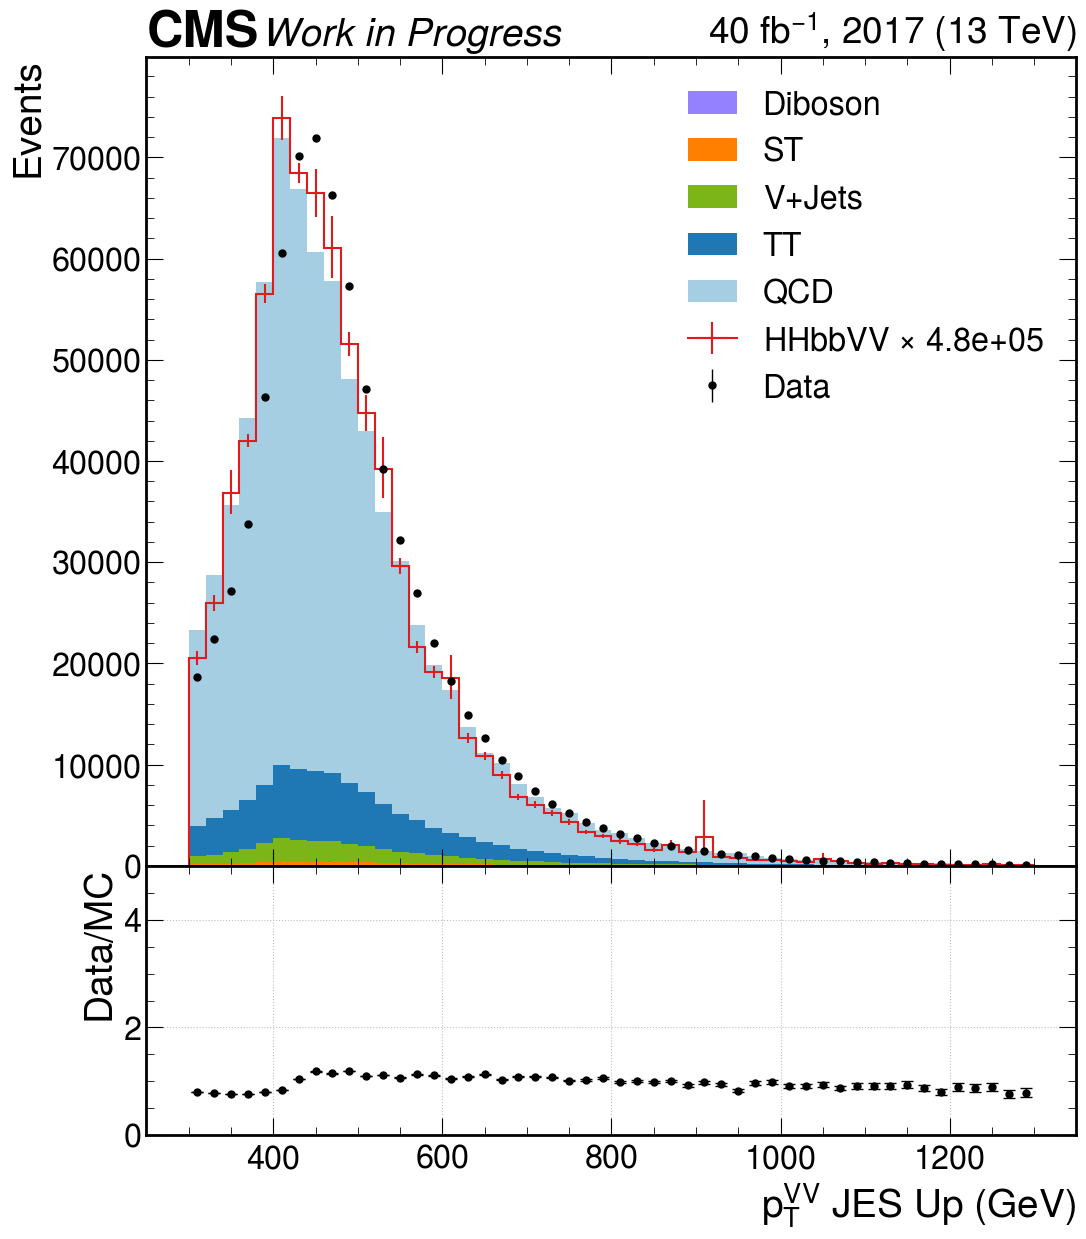

{'bbFatJetPt': Hist(
   StrCategory(['HHbbVV', 'TT', 'ST', 'V+Jets', 'Data', 'QCD', 'Diboson'], name='Sample'),
   Regular(50, 300, 1300, name='bbFatJetPt', label='$p^{bb}_T$ (GeV)'),
   storage=Weight()) # Sum: WeightedSum(value=1.50812e+06, variance=1.57459e+07) (WeightedSum(value=1.51218e+06, variance=1.57795e+07) with flow),
 'bbFatJetPt_JES_up': Hist(
   StrCategory(['HHbbVV', 'TT', 'ST', 'V+Jets', 'Data', 'QCD', 'Diboson'], name='Sample'),
   Regular(50, 300, 1300, name='bbFatJetPt_JES_up', label='$p^{bb}_T$ JES Up (GeV)'),
   storage=Weight()) # Sum: WeightedSum(value=1.51049e+06, variance=1.57773e+07) (WeightedSum(value=1.51218e+06, variance=1.57795e+07) with flow),
 'VVFatJetPt': Hist(
   StrCategory(['HHbbVV', 'TT', 'ST', 'V+Jets', 'Data', 'QCD', 'Diboson'], name='Sample'),
   Regular(50, 300, 1300, name='VVFatJetPt', label='$p^{VV}_T$ (GeV)'),
   storage=Weight()) # Sum: WeightedSum(value=1.50821e+06, variance=1.57625e+07) (WeightedSum(value=1.51218e+06, variance=1.57795e+07

In [21]:
# {var: (bins, label)}
control_plot_vars = {
    "bbFatJetPt": ([50, 300, 1300], r"$p^{bb}_T$ (GeV)"),
    "bbFatJetPt_JES_up": ([50, 300, 1300], r"$p^{bb}_T$ JES Up (GeV)"),
    "VVFatJetPt": ([50, 300, 1300], r"$p^{VV}_T$ (GeV)"),
    "VVFatJetPt_JES_up": ([50, 300, 1300], r"$p^{VV}_T$ JES Up (GeV)"),
}

postprocessing.control_plots(
    events_dict,
    bb_masks,
    control_plot_vars,
    plot_dir,
    year,
    show=True,
)

In [84]:
BDT_samples = list(samples.keys())


# TODO: Change VV msd to regressed mass?
BDT_data_vars = [
    "MET_pt",
    "DijetEta",
    "DijetPt",
    "DijetMass",
    "bbFatJetPt",
    "VVFatJetEta",
    "VVFatJetPt",
    "VVFatJetMsd",
    "VVFatJetParTMD_THWW4q",
    "VVFatJetParTMD_probQCD",
    "VVFatJetParTMD_probHWW3q",
    "VVFatJetParTMD_probHWW4q",
    "VVFatJetParTMD_probT",
    "bbFatJetParticleNetMD_Txbb",
    "bbFatJetPtOverDijetPt",
    "VVFatJetPtOverDijetPt",
    "VVFatJetPtOverbbFatJetPt",
    "finalWeight",
]

jec_jmsr_vars = []

for var in BDT_data_vars:
    if var in jec_vars:
        for jshift in jec_shifts:
            jec_jmsr_vars.append(f"{var}_{jshift}")

    if var in jmsr_vars:
        for jshift in jmsr_shifts:
            jec_jmsr_vars.append(f"{var}_{jshift}")


bdt_events_dict = []

for sample in BDT_samples:
    save_vars = BDT_data_vars + jec_jmsr_vars if sample != "Data" else BDT_data_vars
    events = pd.DataFrame(
        {var: utils.get_feat(events_dict[sample], var, bb_masks[sample]) for var in save_vars}
    )
    events["Dataset"] = sample
    bdt_events_dict.append(events)

bdt_events = pd.concat(bdt_events_dict, axis=0)

import pyarrow.parquet as pq
import pyarrow as pa

table = pa.Table.from_pandas(bdt_events)
pq.write_table(table, f"{samples_dir}/{year}_bdt_data.parquet")